In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


In [3]:
data = pd.read_csv("data/performance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Check the data

- Check Missing Values
- Check Duplicates
- Check Data Type
- Check the Unique Values of the Categorical Columns
- Check Statistics of the Numerical Columns


In [4]:
data.isna().sum() / data.shape[0]

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
numeric_features = data.select_dtypes(include=[np.number]).columns

In [23]:
categorical_values = (
    data.select_dtypes(include=[object])
    .apply(lambda col: col.unique().tolist())
    .to_dict()
)

In [24]:
categorical_values

{'gender': ['female', 'male'],
 'race/ethnicity': ['group B', 'group C', 'group A', 'group D', 'group E'],
 'parental level of education': ["bachelor's degree",
  'some college',
  "master's degree",
  "associate's degree",
  'high school',
  'some high school'],
 'lunch': ['standard', 'free/reduced'],
 'test preparation course': ['none', 'completed']}

In [34]:
value_counts_dict = {col: data[col].value_counts() for col in categorical_values.keys()}

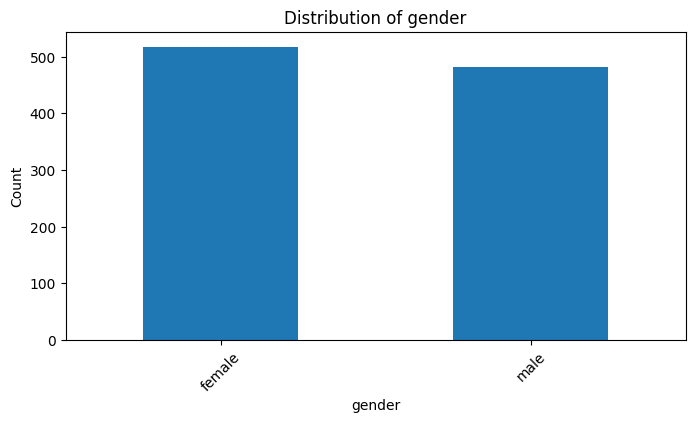

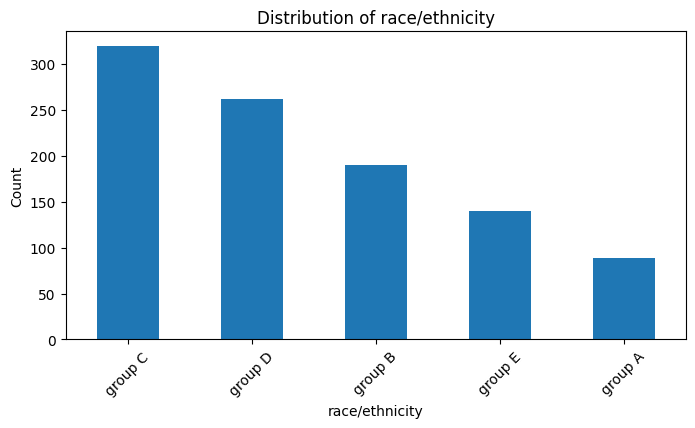

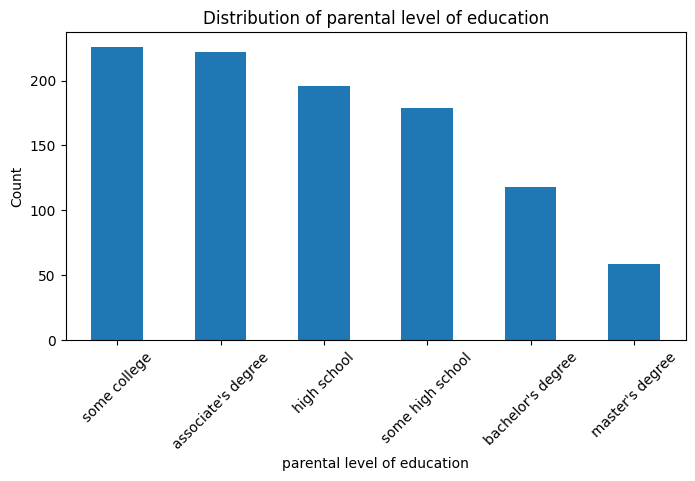

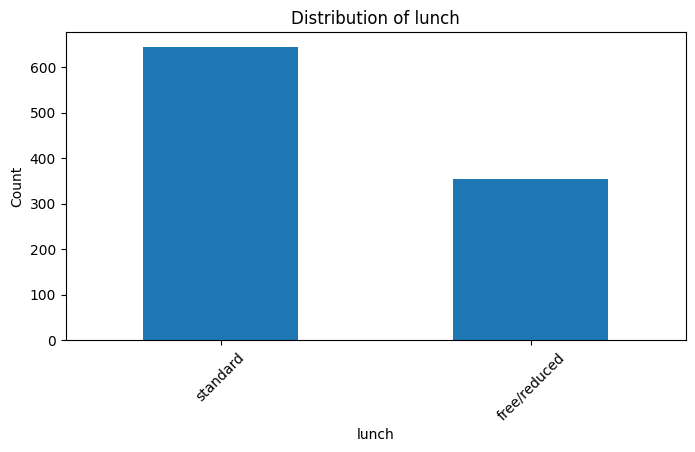

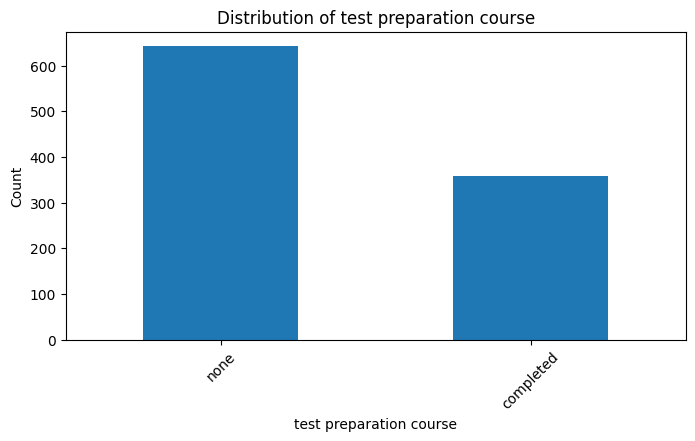

In [42]:
for col in data.select_dtypes(include=[object]).columns:
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [45]:
data["average"] = data[["math score", "reading score", "writing score"]].mean(axis=1)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


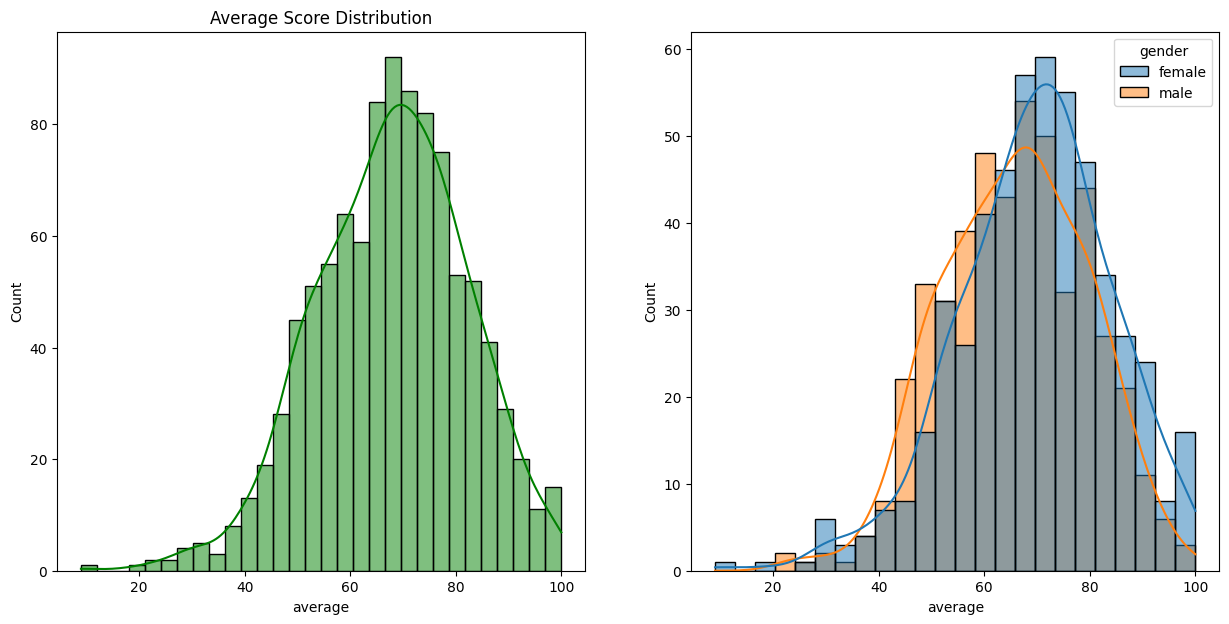

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data, x="average", bins=30, kde=True, color="g")
plt.title("Average Score Distribution")
plt.subplot(122)
sns.histplot(data=data, x="average", kde=True, hue="gender")
plt.show()

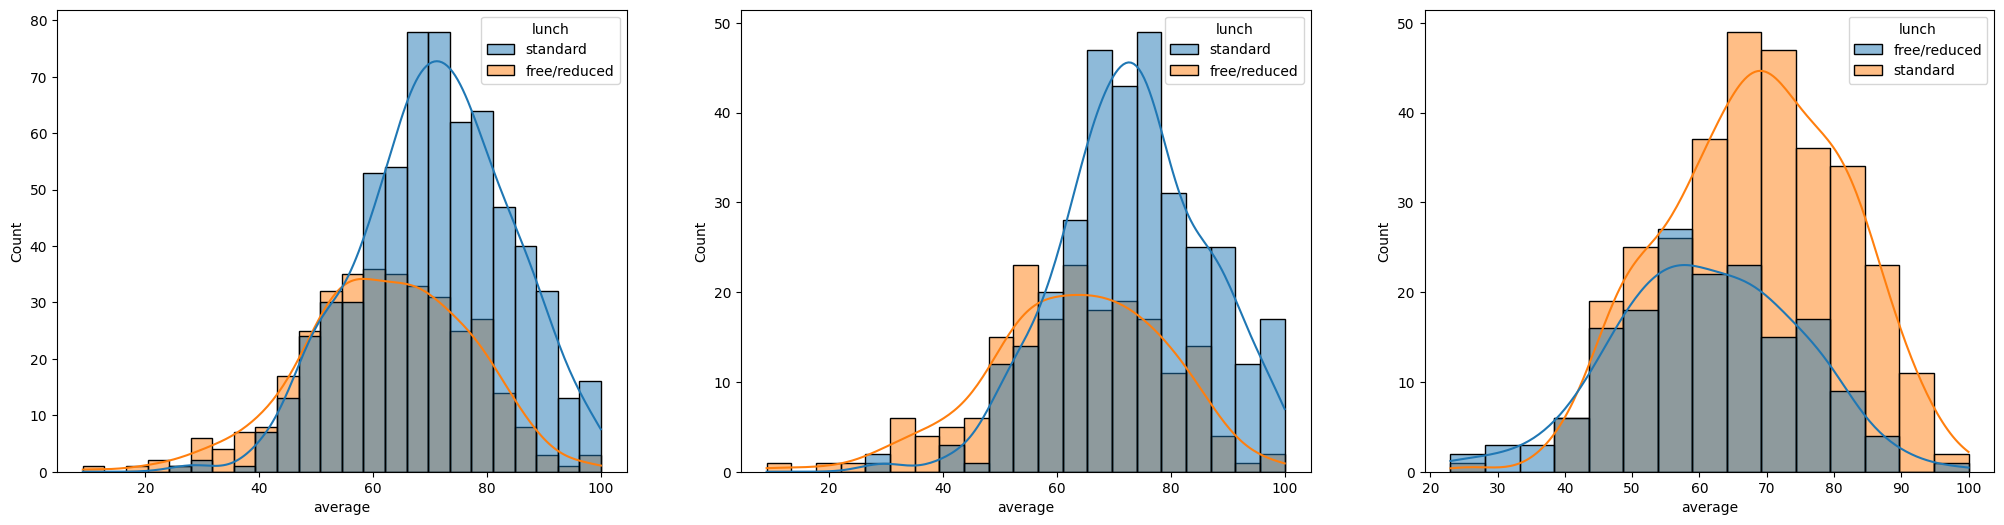

In [50]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=data, x="average", kde=True, hue="lunch")
plt.subplot(132)
sns.histplot(data=data[data.gender == "female"], x="average", kde=True, hue="lunch")
plt.subplot(133)
sns.histplot(data=data[data.gender == "male"], x="average", kde=True, hue="lunch")
plt.show()

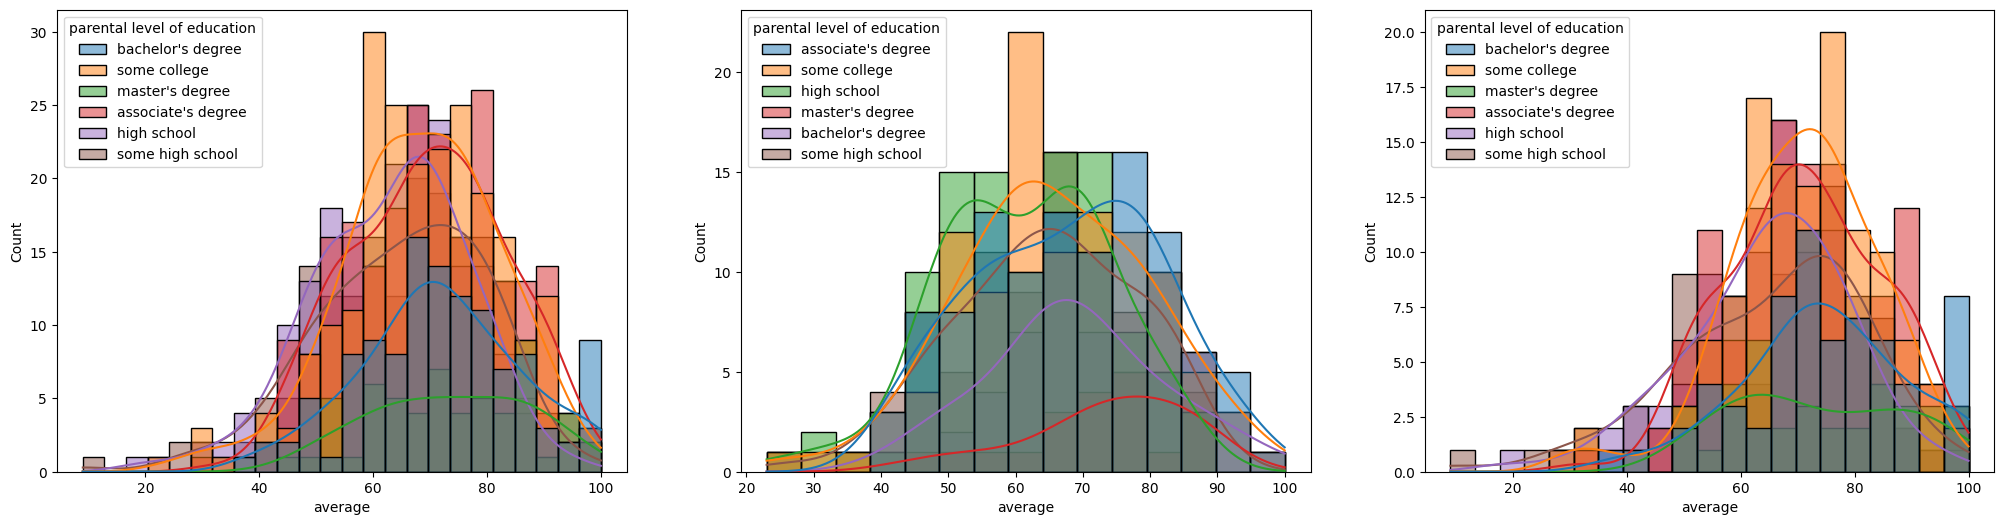

In [51]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
ax = sns.histplot(data=data, x="average", kde=True, hue="parental level of education")
plt.subplot(132)
ax = sns.histplot(
    data=data[data.gender == "male"],
    x="average",
    kde=True,
    hue="parental level of education",
)
plt.subplot(133)
ax = sns.histplot(
    data=data[data.gender == "female"],
    x="average",
    kde=True,
    hue="parental level of education",
)
plt.show()

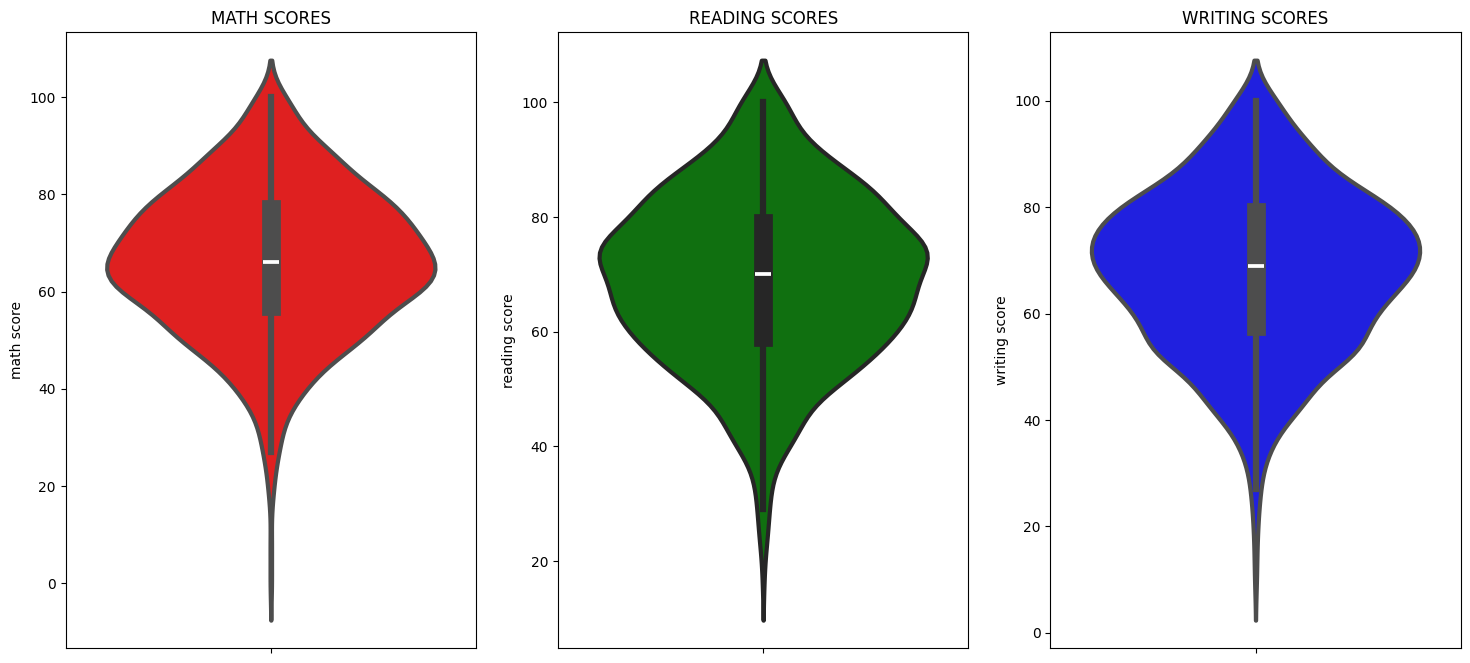

In [53]:
plt.figure(figsize=(18, 8))
plt.subplot(131)
plt.title("MATH SCORES")
sns.violinplot(y="math score", data=data, color="red", linewidth=3)
plt.subplot(132)
plt.title("READING SCORES")
sns.violinplot(y="reading score", data=data, color="green", linewidth=3)
plt.subplot(133)
plt.title("WRITING SCORES")
sns.violinplot(y="writing score", data=data, color="blue", linewidth=3)
plt.show()